# Анализ использования мобильного приложения для аренды самокатов GoFast с целью оптимизации бизнес-процессов и увеличения эффективности сервиса

#### Краткое описание проекта:

Данный проект ориентирован на анализ данных относительно пользователей, их поездок и подписок в популярном сервисе аренды самокатов GoFast. 

Проведено исследование с целью выявления путей оптимизации бизнес-процессов и разработки стратегий для увеличения эффективности сервиса.

**Цель проекта:**

Целью проекта является проведение анализа данных, полученных от пользователей GoFast, с целью подтверждения или опровержения гипотез, способствующих увеличению роста бизнеса. 

Постараемся определить оптимальные механизмы использования подписок, определить паттерны поведения пользователей и предложить рекомендации по оптимизации стоимостей и предложений.

**Описание данных:**

1. **Пользователи (users_go.csv):**

* **user_id:** Уникальный идентификатор пользователя.
* **name:** Имя пользователя.
* **age:** Возраст пользователя.
* **city:** Город пользователя.
* **subscription_type:** Тип подписки пользователя (free, ultra).

2. **Поездки (rides_go.csv):**

* **user_id:** Уникальный идентификатор пользователя.
* **distance:** Расстояние, которое пользователь проехал в текущей сессии (в метрах).
* **duration:** Продолжительность поездки (в минутах).
* **date:** Дата совершения поездки.

3. **Подписки (subscriptions_go.csv):**

* **subscription_type:** Тип подписки.
* **minute_price:** Стоимость одной минуты поездки по данной подписке.
* **start_ride_price:** Стоимость начала поездки.
* **subscription_fee:** Стоимость ежемесячного платежа за подписку.

**План работы :**
1. Предобработка данных
2. Исследовательский анализ данных
3. Объединение данных
4. Подсчёт выручки
5. Проверка гипотез
6. Распределения


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import math
from scipy import stats as st
from scipy.stats import binom, norm
from math import factorial
from math import sqrt

#### Шаг 1. Загрузка данных

In [2]:
# Загрузим первый датафрейм
data_users = pd.read_csv('/datasets/users_go.csv')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [3]:
# Посмотрим первые 10 строк
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
# Загрузим второй датафрейм
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [5]:
# Посмотрим первые 10 строк
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
# Загрузим третий датафрейм
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [7]:
# Сток всего 2, посмотрим полностью
data_subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод**
- Тип даннх в столбце date - object, следует поменять на datetime
- Также было бы удобно добавить месяц поездки отдельным столбцом
- Потенциально столбцы name, city, subscription_type могут содержать неявные дубликаты
- Стоит проверить каджый датафрейм на содержание дубликатов

#### Шаг 2. Предобработка данных

##### Изменение типов данных и проверка записи столбцов

**Проверим правильность записи названия столбцов**

In [8]:
data_users.columns.tolist()

['user_id', 'name', 'age', 'city', 'subscription_type']

In [9]:
data_rides.columns.tolist()

['user_id', 'distance', 'duration', 'date']

In [10]:
data_subscriptions.columns.tolist()

['subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee']

Ошибок в записи нет

**Изменение типа данных и добавление столбца**

In [11]:
# Изменяем тип данных в data_rides['date'] с object на datetime
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [12]:
# Проверим результат
data_rides.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

In [13]:
# Добавим в датафрейм столбец с месяцем поездки
data_rides['month'] = pd.DatetimeIndex(data_rides['date']).month 

In [14]:
# Проверим результат
data_rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


**Вывод :**

- Ошибок в записи названия столбцов не обнаружено
- Изменили тип данных в стоблце 'date' таблицы data_rides с object на datetime
- Добавили в датафрейм столбец с месяцем поездки

##### Проверка дубликатов и пропусков

**Дубликаты в data_users**

In [15]:
# Проверим, сколько дубликатов есть в data_users
data_users.duplicated().sum()

31

In [16]:
print(f'Процент дубликатов в датафрейме data_users : {round((data_users.duplicated().sum() / len(data_users)) * 100, 2)}%')

Процент дубликатов в датафрейме data_users : 1.98%


In [17]:
# Процент меньше 10, удалим все эти строчки
data_users.drop_duplicates(inplace=True)

In [18]:
# Проверим результат
data_users.duplicated().sum()

0

In [19]:
# Проверим сколько пропусков есть в датафрейме
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

**Проверка неявных дубликатов**

In [20]:
# Проверим столбец city на наличие неявных дубликатов
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [21]:
# Проверим столбец name на наличие неявных дубликатов
data_users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [22]:
# Проверим столбец subscription_type на наличие неявных дубликатов
data_users['subscription_type'].unique() 

array(['ultra', 'free'], dtype=object)

**Вывод:**
- Процент дубликатов в датафрейме data_users : 1.98%. Все строчки-дубликаты были удалены
- В датафрейме data_users нет пропусков в данных
- В датафрейме data_users нет неявных дубликатов

**Дубликаты в data_rides**

In [23]:
# Проверим, сколько дубликатов есть в data_rides
data_rides.duplicated().sum()

0

In [24]:
# Проверим сколько пропусков есть в датафрейме
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

**Вывод :**
    
- В датафрейме data_rides нет дубликатов
- В датафрейме data_rides нет пропусков

##### Выбросы и аномалии

**Проверка выбросов и аномалий в столбце distance датафрейма data_rides**

In [25]:
# Посмотрим статистику distance
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

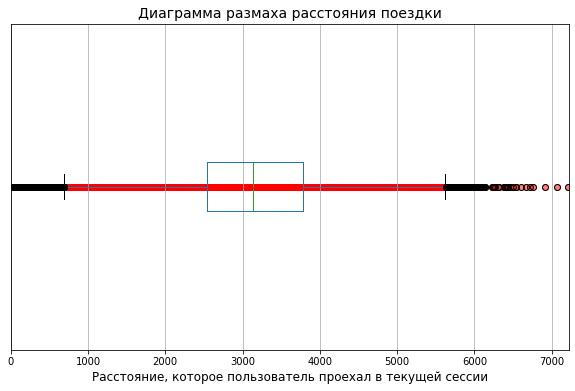

In [26]:
# Построим диаграмму размаха
data_rides.boxplot(column='distance', figsize=(10, 6), vert=False)
plt.xlim(0, 7220)
plt.xlabel('Расстояние, которое пользователь проехал в текущей сессии', fontsize=12)
plt.yticks([])
plt.title('Диаграмма размаха расстояния поездки', fontsize=14)
plt.scatter(x=data_rides['distance'], y=np.repeat(1, len(data_rides['distance'])), color='red', alpha=0.5)
plt.show()

In [27]:
# Используем метод quantile и посмотрим выбросы, которые выходят за 1% с обеих сторон
low_percentele = 0.01
high_percentele = 0.99

distance_low = data_rides['distance'].quantile(low_percentele)
distance_high = data_rides['distance'].quantile(high_percentele)

print(f'Нижняя граница distance {distance_low}')
print(f'Нижняя граница distance {distance_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data_rides.query('@distance_low <= distance <= @distance_high'))
        / len(data_rides['distance']) * 100,
        2
    ),
    '%'
)

Нижняя граница distance 208.08440510728332
Нижняя граница distance 5478.621527829257
Процент отброшенных значений =  2.0 %


Т.к. процент невелик, можем оставить эти строки

**Проверка выбросов и аномалий в столбце duration датафрейма data_rides**

In [28]:
# Посмотрим статистику duration
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

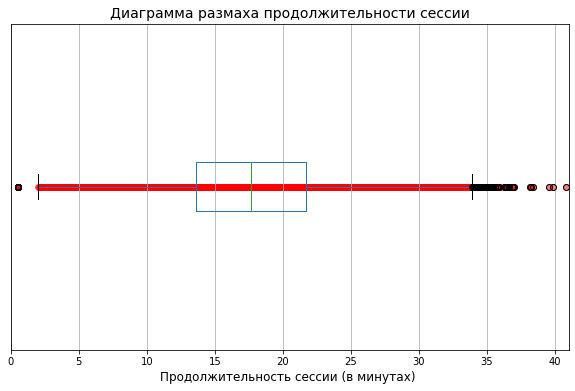

In [29]:
# Построим диаграмму размаха
data_rides.boxplot(column='duration', figsize=(10, 6), vert=False)
plt.xlim(0, 41)
plt.xlabel('Продолжительность сессии (в минутах) ', fontsize=12)
plt.yticks([])
plt.title('Диаграмма размаха продолжительности сессии', fontsize=14)
plt.scatter(x=data_rides['duration'], y=np.repeat(1, len(data_rides['duration'])), color='red', alpha=0.5)
plt.show()

In [30]:
# Используем метод quantile и посмотрим выбросы, которые выходят за 1% с обеих сторон
duration_low = data_rides['duration'].quantile(low_percentele)
duration_high = data_rides['duration'].quantile(high_percentele)

print(f'Нижняя граница distance {duration_low}')
print(f'Нижняя граница distance {duration_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data_rides.query('@duration_low <= duration <= @duration_high'))
        / len(data_rides['duration']) * 100,
        2
    ),
    '%'
)

Нижняя граница distance 3.9821051350591543
Нижняя граница distance 32.50358023064304
Процент отброшенных значений =  2.0 %


Т.к. процент невелик, можем оставить эти строки

**Вывод :**

- Обнаружили выбросы в столбце distance датафрейма data_rides. Не стали отбрасывать эти значения
- Обнаружили выбросы в столбце duration датафрейма data_rides. Не стали отбрасывать эти значения

##### Вывод по предобработке данных

1. **Изменение типов данных и проверка записи столбцов**

    - Ошибок в записи названия столбцов не обнаружено
    - Изменили тип данных в стоблце 'date' таблицы data_rides с object на datetime
    - Добавили в датафрейм столбец с месяцем поездки
    
2. **Проверка дубликатов и пропусков**
    - Процент дубликатов в датафрейме data_users : 1.98%. Все строчки-дубликаты были удалены
    - В датафрейме data_users нет пропусков в данных
    - В датафрейме data_users нет неявных дубликатов
    - В датафрейме data_rides нет дубликатов
    - В датафрейме data_rides нет пропусков
3. **Выбросы и аномалии**
    - Обнаружили выбросы в столбце distance датафрейма data_rides. Не стали отбрасывать эти значения
    - Обнаружили выбросы в столбце duration датафрейма data_rides. Не стали отбрасывать эти значения

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [31]:
# С помощью метода value_counts() посчитаем кол-во пользователей в разных городах
city_frequency = data_users['city'].value_counts()
city_frequency

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [32]:
# Взглянем на статистику
city_frequency.describe()

count      8.000000
mean     191.750000
std       15.672998
min      168.000000
25%      182.250000
50%      191.000000
75%      199.500000
max      219.000000
Name: city, dtype: float64

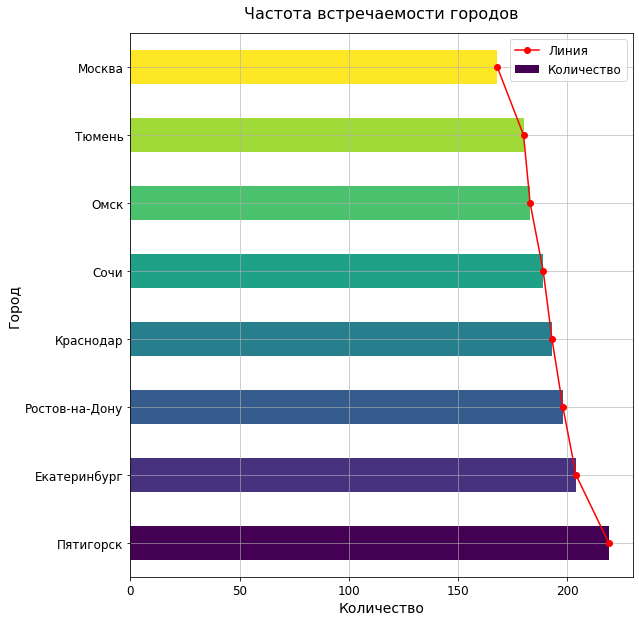

In [33]:
# Для наглядности построим графики
x_line = np.arange(len(city_frequency))
y_line = city_frequency
# Генерация градиента цветов для столбиков
num_bars_city_frequency = len(city_frequency)
color_map_city_frequency = plt.cm.get_cmap('viridis', num_bars_city_frequency)  
# Создание списка цветов на основе градиента
bar_colors_city_frequency = [color_map_city_frequency(i) for i in np.linspace(0, 1, num_bars_city_frequency)]
# Создание столбчатой диаграммы
plt.figure(figsize=(9, 10))
city_frequency.plot(kind='barh', figsize=(9, 10), label='Количество', color=bar_colors_city_frequency)  # Используем barh() вместо bar()
plt.plot(y_line, x_line, marker='o', linestyle='-', color='r', label='Линия')  # Меняем x_line и y_line местами
plt.title('Частота встречаемости городов', fontsize=16, pad=15)
plt.xlabel('Количество', fontsize=14)  # Меняем подпись оси x
plt.ylabel('Город', fontsize=14)  # Меняем подпись оси y
plt.yticks(x_line, city_frequency.index, fontsize=12)  # Меняем ticks и labels местами
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

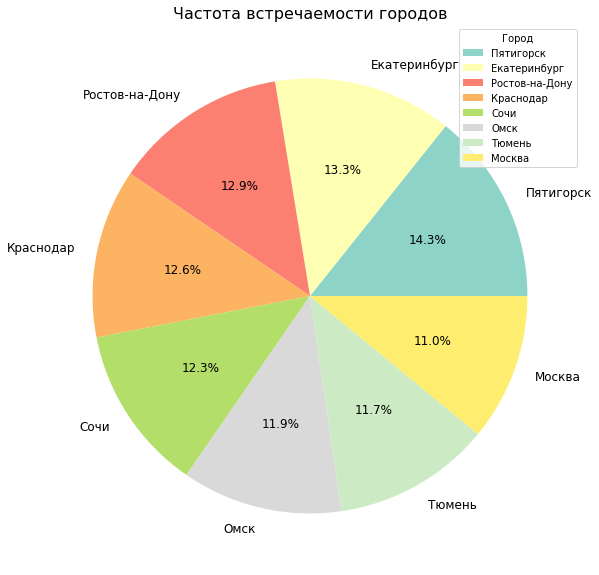

In [34]:
#Генерация цветовой палитры
num_city_frequency = len(city_frequency)
color_map_city_frequency = plt.cm.get_cmap('Set3', num_city_frequency)
bar_colors_city_frequency = [color_map_city_frequency(i) for i in np.linspace(0, 1, num_city_frequency)]

#Создание круговой диаграммы
plt.figure(figsize=(14, 10))
plt.pie(city_frequency, labels=city_frequency.index, autopct='%.1f%%', colors=bar_colors_city_frequency, textprops={'fontsize': 12})
plt.title('Частота встречаемости городов', fontsize=16)
plt.legend(city_frequency.index, title='Город', loc='best', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Вывод**

- Среднее число пользователей в городе = 192
- В таблице представлена информация по городам, с наибольшим кол-вом пользователей

| Город | Количество пользователей | Часть от всех пользователей в % |
|:------------:|:------------:|:------------:|
| Пятигорск   | 219   | 14.3   |
| Екатеринбург    | 204   | 13.3   |
| Ростов-на-Дону  | 198   | 12.9   |


- В таблице представлена информация по городам, с наименьшим кол-вом пользователей

| Город | Количество пользователей | Часть от всех пользователей в % |
|:------------:|:------------:|:------------:|
| Омск   | 183   | 11.9   |
| Тюмень    | 180   | 11.7   |
| Москва  | 168   | 11.0   | 



##### Соотношение пользователей с подпиской и без подписки

In [35]:
# С помощью метода value_counts() посчитаем кол-во пользователей с разными типами подписок
subscription_ratio = data_users['subscription_type'].value_counts()
subscription_ratio

free     835
ultra    699
Name: subscription_type, dtype: int64

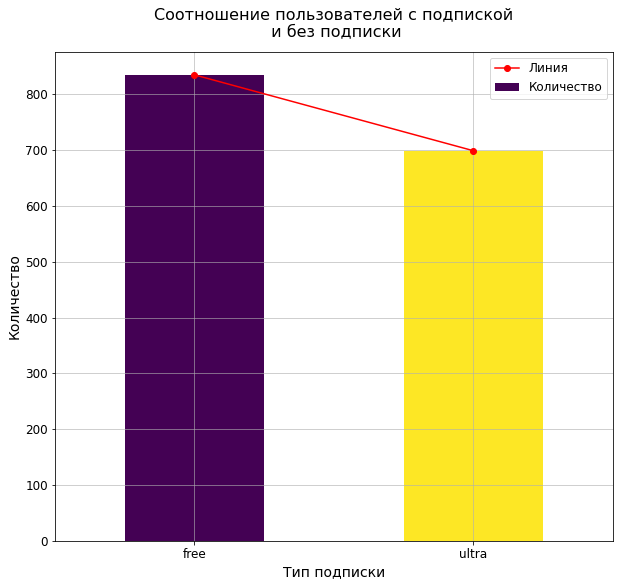

In [36]:
# Для наглядности построим графики
x_line = np.arange(len(subscription_ratio))
y_line = subscription_ratio
#Генерация градиента цветов для столбиков
num_bars_subscription_ratio = len(subscription_ratio)
color_map_subscription_ratio = plt.cm.get_cmap('viridis', num_bars_subscription_ratio)  
#Создание списка цветов на основе градиента
bar_colors_subscription_ratio = [color_map_subscription_ratio(i) for i in np.linspace(0, 1, num_bars_subscription_ratio)]
# Создание столбчатой диаграммы
plt.figure(figsize=(10, 9))
subscription_ratio.plot(kind='bar', figsize=(10, 9), label='Количество', color=bar_colors_subscription_ratio)
plt.plot(x_line, y_line, marker='o', linestyle='-', color='r', label='Линия')
plt.title('Соотношение пользователей с подпиской\n и без подписки', fontsize=16, pad=15)
plt.xlabel('Тип подписки', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(x_line, subscription_ratio.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

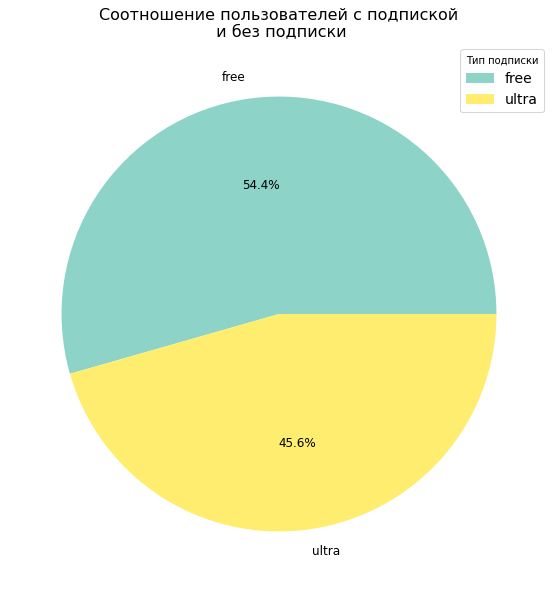

In [37]:
#Генерация цветовой палитры
num_subscription_ratio = len(subscription_ratio)
color_map_subscription_ratio = plt.cm.get_cmap('Set3', num_subscription_ratio)
bar_colors_subscription_ratio = [color_map_subscription_ratio(i) for i in np.linspace(0, 1, num_subscription_ratio)]

#Создание круговой диаграммы
plt.figure(figsize=(14, 10))
plt.pie(subscription_ratio, labels=subscription_ratio.index, autopct='%.1f%%', colors=bar_colors_subscription_ratio, textprops={'fontsize': 12})
plt.title('Соотношение пользователей с подпиской\n и без подписки', fontsize=16)
plt.legend(subscription_ratio.index, title='Тип подписки', loc='best', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Вывод**
- В таблице представлена информация о пользователях с различными типами подписок

| Тип подписки | Количество пользователей | Часть от всех пользователей в % |
|:------------:|:------------:|:------------:|
| Ultra  | 699   | 45.6   |
| Free    | 835   | 54.4   |


##### Возраст пользователей

In [38]:
# С помощью метода value_counts() посчитаем кол-во пользователей разного возраста
users_age = data_users['age'].value_counts()
users_age

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

In [39]:
# Взглянем на статистику
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

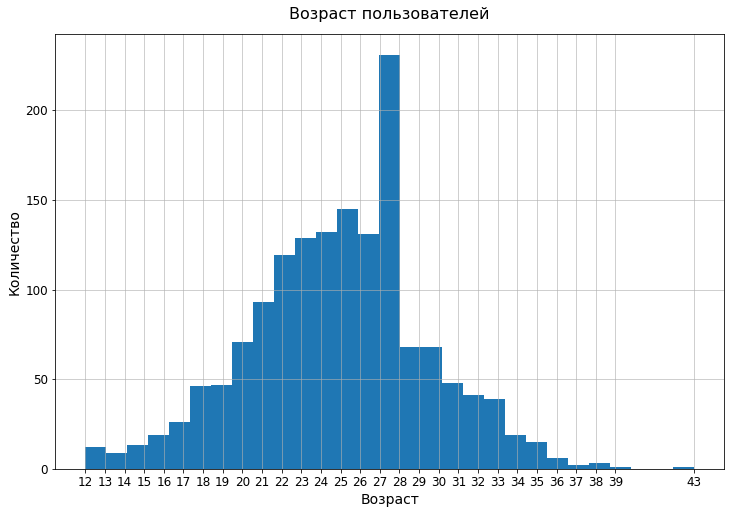

In [40]:
# Построим гистограмму
plt.figure(figsize=(12, 8))
plt.hist(users_age.index, bins= len(users_age), weights=users_age.values)  
plt.title('Возраст пользователей', fontsize=16, pad=15)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(users_age.index, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

In [41]:
# Посчитаем процент пользователей разного возраста
total_users = users_age.sum()

#Сортировка в убывающем порядке
users_age_sorted = users_age.sort_values(ascending=False)

for age, count in users_age_sorted.items():
    percentage = (count / total_users) * 100
    print(f"Процент пользователей с возрастом {age} г. = {round(percentage, 2)}%")

Процент пользователей с возрастом 25 г. = 9.45%
Процент пользователей с возрастом 24 г. = 8.6%
Процент пользователей с возрастом 26 г. = 8.54%
Процент пользователей с возрастом 23 г. = 8.41%
Процент пользователей с возрастом 27 г. = 7.76%
Процент пользователей с возрастом 22 г. = 7.76%
Процент пользователей с возрастом 28 г. = 7.3%
Процент пользователей с возрастом 21 г. = 6.06%
Процент пользователей с возрастом 20 г. = 4.63%
Процент пользователей с возрастом 30 г. = 4.43%
Процент пользователей с возрастом 29 г. = 4.43%
Процент пользователей с возрастом 31 г. = 3.13%
Процент пользователей с возрастом 19 г. = 3.06%
Процент пользователей с возрастом 18 г. = 3.0%
Процент пользователей с возрастом 32 г. = 2.67%
Процент пользователей с возрастом 33 г. = 2.54%
Процент пользователей с возрастом 17 г. = 1.69%
Процент пользователей с возрастом 34 г. = 1.24%
Процент пользователей с возрастом 16 г. = 1.24%
Процент пользователей с возрастом 35 г. = 0.98%
Процент пользователей с возрастом 15 г. = 0

**Вывод**
- Средний возраст пользователя = 25
- Возраст наиболее активных пользователей приведен в таблице:

| Возраст | Количество пользователей | Часть от всех пользователей в % |
|:------------:|:------------:|:------------:|
| 25 | 145   | 9.45   |
| 24   | 132   | 8.6   |
| 26   | 131   | 8.54   |

- Возраст наименее активных пользователей приведен в таблице:


    
| Возраст | Количество пользователей | Часть от всех пользователей в % |
|:------------:|:------------:|:------------:|
| 37 | 2   | 0.13   |
| 39   | 1   | 0.07   |
| 43   | 1   | 0.07   |
    


##### Расстояние, которое пользователь преодолел за одну поездку

In [42]:
# Взглянем на статистику
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

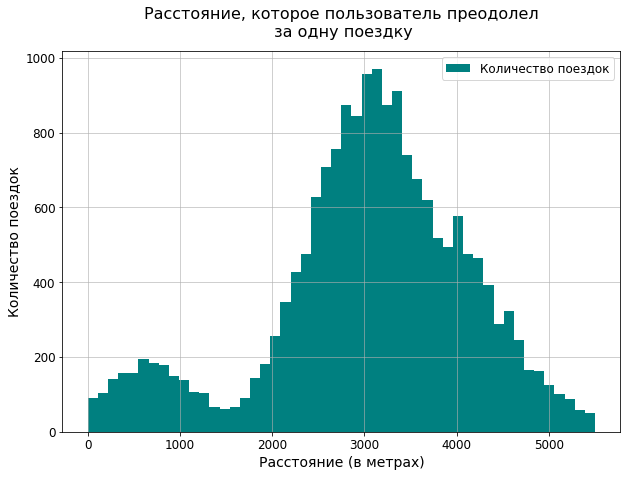

In [43]:
#Посмотрим на распределение
data_rides['distance'].hist(bins=50, range=(0, 5500), figsize=(10,7), color='teal')

plt.title('Расстояние, которое пользователь преодолел\n за одну поездку', fontsize=16, pad=15)
plt.xlabel('Расстояние (в метрах)', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество поездок'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

**Вывод**
- Среднее расстояние, которое пользователь преодолел за одну поездку = 3070 м., а медиана = 3134 м.
- В основном пользователи проезжают от 2000 до 4700 метров
- Виден маленький колокол на отрезке [0, 1500] и побольше, на отрезке [2000 , 4700]. Можно отнести первый колокол к категории коротких поездкок, а второй к категории длинных

##### Продолжительность поездок

In [44]:
# Взглянем на статистику
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

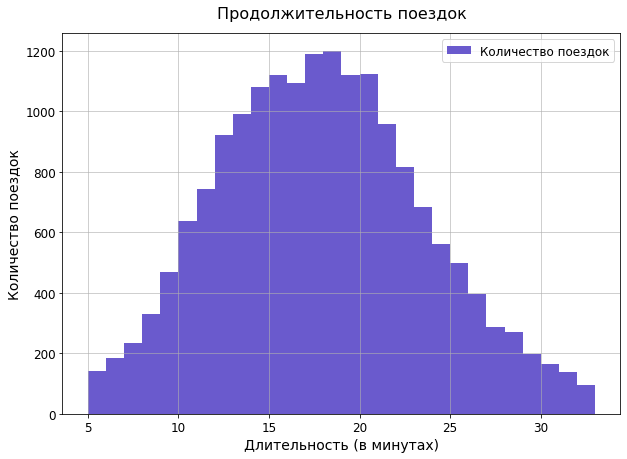

In [45]:
#Посмотрим на распределение
data_rides['duration'].hist(bins=28, range=(5, 33), figsize=(10,7), color='slateblue')

plt.title('Продолжительность поездок', fontsize=16, pad=15)
plt.xlabel('Длительность (в минутах)', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество поездок'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

**Вывод**
- Средняя продолжительность поездки = 18 мин.
- В основном пользователи используют самокат от 10 до 25 минут
- Распределение похоже на нормальное

##### Вывод по исследовательскому анализу данных

1. **Частота встречаемости городов**

    - Среднее число пользователей в городе = 192
    - В таблице представлена информация по городам с наибольшим количеством пользователей:

        | Город          | Количество пользователей | Часть от всех пользователей в % |
        |:--------------:|:-----------------------:|:-------------------------------:|
        | Пятигорск      |           219           |              14.3               |
        | Екатеринбург   |           204           |              13.3               |
        | Ростов-на-Дону |           198           |              12.9               |

    - В таблице представлена информация по городам с наименьшим количеством пользователей:

        | Город     | Количество пользователей | Часть от всех пользователей в % |
        |:---------:|:-----------------------:|:-------------------------------:|
        | Омск      |           183           |              11.9               |
        | Тюмень    |           180           |              11.7               |
        | Москва    |           168           |              11.0               |


    
2. **Соотношение пользователей с подпиской и без подписки**
    - В таблице представлена информация о пользователях с различными типами подписок

| Тип подписки | Количество пользователей | Часть от всех пользователей в % |
|:------------:|:------------:|:------------:|
| Ultra  | 699   | 45.6   |
| Free    | 835   | 54.4   |

3. **Возраст пользователей**
    - Средний возраст пользователя = 25
    - Возраст наиболее активных пользователей приведен в таблице:

        | Возраст | Количество пользователей | Часть от всех пользователей в % |
        |:-------:|:-----------------------:|:-------------------------------:|
        |    25   |          145            |               9.45              |
        |    24   |          132            |                8.6              |
        |    26   |          131            |               8.54              |

    - Возраст наименее активных пользователей приведен в таблице:
    
        | Возраст | Количество пользователей | Часть от всех пользователей в % |
        |:-------:|:-----------------------:|:-------------------------------:|
        |    37   |            2            |               0.13              |
        |    39   |            1            |               0.07              |
        |    43   |            1            |               0.07              |


4. **Расстояние, которое пользователь преодолел за одну поездку**
    - Среднее расстояние, которое пользователь преодолел за одну поездку = 3070 м., а медиана = 3134 м.
    - В основном пользователи проезжают от 2000 до 4700 метров
    - Виден маленький колокол на отрезке [0, 1500] и побольше, на отрезке [2000 , 4700]. Можно отнести первый колокол к категории коротких поездкок, а второй к категории длинных
    
5. **Продолжительность поездок**
    - Средняя продолжительность поездки = 18 мин.
    - В основном пользователи используют самокат от 10 до 25 минут
    - Распределение похоже на нормальное


#### Шаг 4. Объединение данных

##### Объединение данных о пользователях, поездках и подписках в один датафрейм.

In [46]:
# С помощью метода merge() объединим данные о пользователях, поездках и подписках в один датафрейм
data_full = pd.merge(data_users, data_rides, on='user_id', how='outer')
data_full

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


##### Создание отделных датафреймов из датафрейма

In [47]:
# Создадим 2 отдельных датафрейма c данными о пользователях без подписки и с данными о пользователях с подпиской.
# Датафрейм с данными о пользователях без подписки.
data_sub_free = data_full.query('subscription_type == "free"')
# Датафрейм  с данными о пользователях с подпиской.
data_sub_ultra = data_full.query('subscription_type == "ultra"')

In [48]:
# Просмотрим первые 10 строк
data_sub_free.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6


In [49]:
# Проверим размерность таблицы
data_sub_free.shape

(11568, 9)

In [50]:
# Просмотрим первые 10 строк
data_sub_ultra.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11


In [51]:
# Проверим размерность таблицы
data_sub_ultra.shape

(6500, 9)

##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

**Визуализация информации о расстоянии и времени поездок для пользователей без подписки**

In [52]:
# Посмотрим статистику
data_sub_free[['distance', 'duration']].describe()

,distance,duration
count,11568.000000,11568.000000
mean,3045.495282,17.390909
std,1246.173806,6.326803
min,0.855683,0.500000
25%,2366.562689,12.958437
50%,3114.648465,17.326890
75%,3905.697894,21.594071
max,7211.007745,34.948498


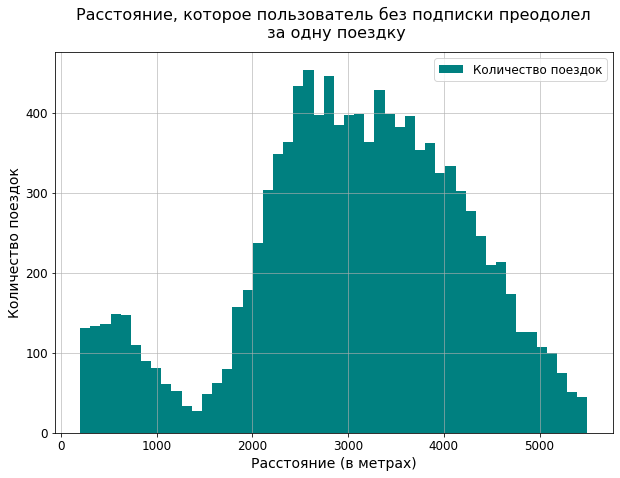

In [53]:
#Посмотрим на распределение
data_sub_free['distance'].hist(bins=50, range=(200, 5500), figsize=(10,7), color='teal')

plt.title('Расстояние, которое пользователь без подписки преодолел\n за одну поездку', fontsize=16, pad=15)
plt.xlabel('Расстояние (в метрах)', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество поездок'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

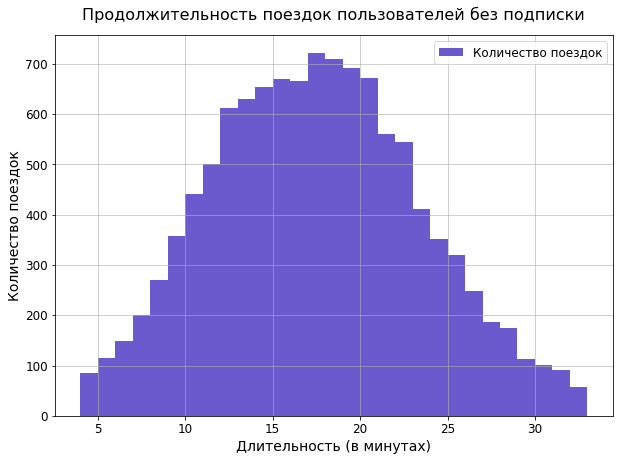

In [54]:
#Посмотрим на распределение продолжительности поездок
data_sub_free['duration'].hist(bins=29, range=(4, 33), figsize=(10,7), color='slateblue')

plt.title('Продолжительность поездок пользователей без подписки', fontsize=16, pad=15)
plt.xlabel('Длительность (в минутах)', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество поездок'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

**Вывод**
1. Информация о расстоянии 
    - Среднее расстояние, которое пользователь преодолел за одну поездку = 3045 м., а медиана = 3115 м.
    - В основном пользователи проезжают от 2000 до 4700 метров
    - Виден маленький колокол на отрезке [0, 1500] и побольше, на отрезке [2000 , 4700]. Можно отнести первый колокол к категории коротких поездкок, а второй к категории длинных


2. Информация о продолжительности поездок
    - Средняя продолжительность поездки = 17 мин.
    - В основном пользователи используют самокат от 10 до 25 минут
    - Распределение похоже на нормальное
    

**Визуализация информации о расстоянии и времени поездок для пользователей с подпиской Ultra**

In [55]:
data_sub_ultra[['distance', 'duration']].describe()

,distance,duration
count,6500.000000,6500.000000
mean,3115.445388,18.541985
std,836.895330,5.572048
min,244.210438,3.760353
25%,2785.444017,14.524654
50%,3148.637229,18.178153
75%,3560.574425,21.884129
max,5699.769662,40.823963


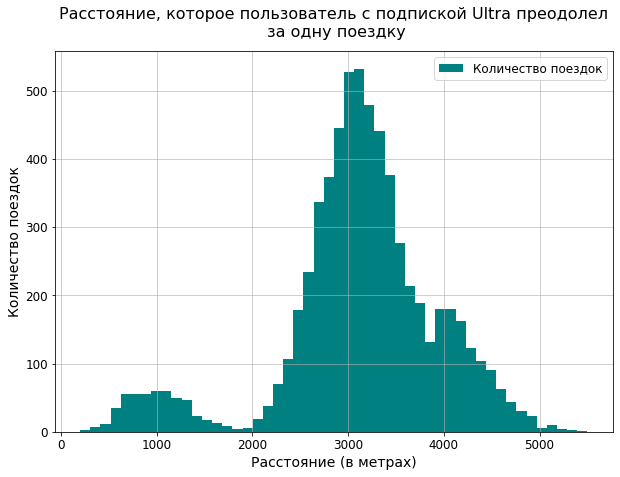

In [56]:
#Посмотрим на распределение
data_sub_ultra['distance'].hist(bins=50, range=(200, 5500), figsize=(10,7), color='teal')

plt.title('Расстояние, которое пользователь с подпиской Ultra преодолел\n за одну поездку', fontsize=16, pad=15)
plt.xlabel('Расстояние (в метрах)', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество поездок'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

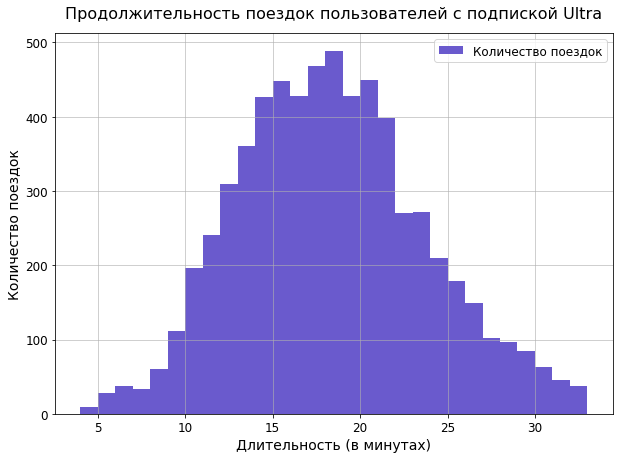

In [57]:
#Посмотрим на распределение
data_sub_ultra['duration'].hist(bins=29, range=(4, 33), figsize=(10,7), color='slateblue')

plt.title('Продолжительность поездок пользователей с подпиской Ultra', fontsize=16, pad=15)
plt.xlabel('Длительность (в минутах)', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество поездок'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

**Сравнение графиков**

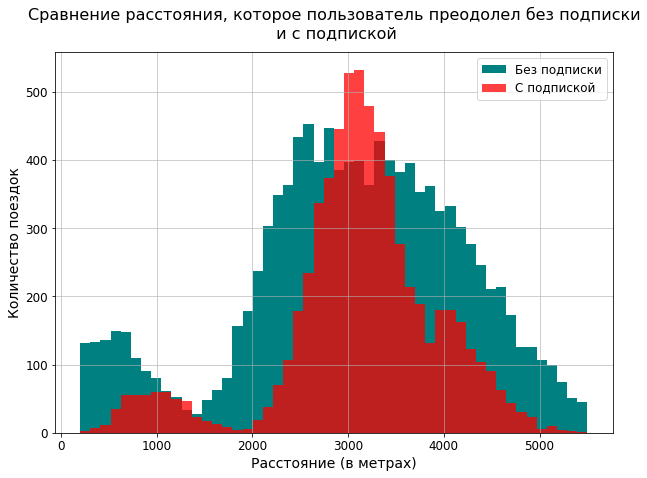

In [58]:
#Посмотрим на распределение
data_sub_free['distance'].hist(bins=50, range=(200, 5500), figsize=(10,7), color='teal', label='Без подписки')
data_sub_ultra['distance'].hist(bins=50, range=(200, 5500), figsize=(10,7), color='red', alpha=0.75, label='С подпиской')

plt.title('Сравнение расстояния, которое пользователь преодолел без подписки\n и с подпиской', fontsize=16, pad=15)

plt.xlabel('Расстояние (в метрах)', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.75)
plt.show()



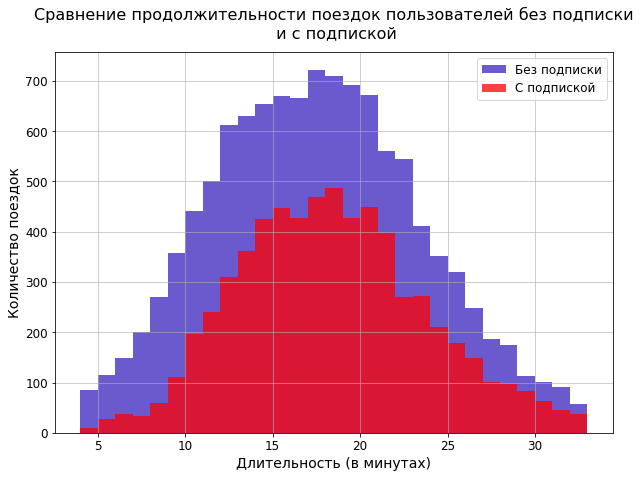

In [59]:
#Посмотрим на распределение продолжительности поездок
data_sub_free['duration'].hist(bins=29, range=(4, 33), figsize=(10,7), color='slateblue', label='Без подписки')
data_sub_ultra['duration'].hist(bins=29, range=(4, 33), figsize=(10,7), color='red', alpha=0.75, label='С подпиской')
plt.title('Сравнение продолжительности поездок пользователей без подписки\n и с подпиской', fontsize=16, pad=15)
plt.xlabel('Длительность (в минутах)', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

**Вывод**

1. Информация о расстоянии 
    - Среднее расстояние, которое пользователь преодолел за одну поездку = 3115 м., а медиана = 3149 м.
    - В основном пользователи проезжают от 2000 до 4700 метров
    - Виден маленький колокол на отрезке [0, 1800] и побольше, на отрезке [2200 , 4600]. Можно отнести первый колокол к категории коротких поездкок, а второй к категории длинных

2. Информация о продолжительности поездок
    - Средняя продолжительность поездки = 18.5 мин.
    - В основном пользователи используют самокат от 10 до 27 минут
    - Распределение похоже на нормальное
    

**Сравнение пользователей с разными категориями подписки :**

1. В среднем пользователи с подпиской проезжают на 70 метров больше
2. В среднем пользователи с подпиской проезжают на 1.5 мин больше
3. Распределение расстояния, которое пользователь с подпиской Ultra, уже в области дальних поездок и шире в области коротких

##### Вывод по объединению данных

1. Объединение данных о пользователях, поездках и подписках в один датафрейм(data_full).
2. Создание отделных датафреймов из датафрейма data_full
    - Датафрейм с данными о пользователях без подписки : data_sub_free
    - Датафрейм с данными о пользователях с подпиской Ultra : data_sub_ultra
3.  Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий
    - Без подписки:
        1. Информация о расстоянии 
            - Среднее расстояние, которое пользователь преодолел за одну поездку = 3045 м., а медиана = 3115 м.
            - В основном пользователи проезжают от 2000 до 4700 метров
        2. Информация о продолжительности поездок
            - Средняя продолжительность поездки = 17 мин.
            - В основном пользователи используют самокат от 10 до 25 минут
            - Распределение похоже на нормальное
    - С подпиской Ultra:
        1. Информация о расстоянии 
            - Среднее расстояние, которое пользователь преодолел за одну поездку = 3115 м., а медиана = 3149 м.
            - В основном пользователи проезжают от 2000 до 4700 метров

        2. Информация о продолжительности поездок
            - Средняя продолжительность поездки = 18.5 мин.
            - В основном пользователи используют самокат от 10 до 27 минут
            - Распределение похоже на нормальное
    - Сравнение пользователей с разными категориями подписки :

        1. В среднем пользователи с подпиской проезжают на 70 метров больше
        2. В среднем пользователи с подпиской проезжают на 1.5 мин больше
        3. Распределение расстояния, которое пользователь с подпиской Ultra, уже в области дальних поездок и шире в области коротких

#### Шаг 5. Подсчёт выручки

##### Создание датафрейма с агрегированными данными о поездках

In [60]:
# Создадим сводную таблицу aggregated_data с объединёнными данными 
#(суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц)
data_full['duration'] = np.ceil(data_full['duration']).astype(int)
aggregated_data = (data_full
                   .pivot_table(
                       index=['user_id', 'month'], 
                       values=['distance', 'duration', 'subscription_type'], 
                       aggfunc={'distance':'sum', 'duration':'sum', 'user_id':'count', 'subscription_type':'first'})
                  )
aggregated_data.columns = ['total_distance', 'total_duration', 'subscription_type', 'number_of_rides']

aggregated_data

total_distance  total_duration subscription_type  \
user_id month                                                     
1       1         7027.511294              42             ultra   
        4          754.159807               7             ultra   
        8         6723.470560              46             ultra   
        10        5809.911100              32             ultra   
        11        7003.499363              56             ultra   
...                       ...             ...               ...   
1534    6         3409.468534              26              free   
        8         7622.453034              48              free   
        9         4928.173852              23              free   
        11       13350.015305              78              free   
        12        2371.711192              16              free   

               number_of_rides  
user_id month                   
1       1                    2  
        4                    1  
        8                    2  
        10                   2  
        11                   3  
...                        ...  
1534    6                    2  
        8                    2  
        9                    1  
        11                   4  
        12                   1  

[11331 rows x 4 columns]

##### Подсчет ежемесячной выручки

In [61]:
# Создадим функцию, которая посчитает выручку
def monthly_revenue(row):
    if row['subscription_type'] == 'ultra':
        start_ride_price = data_subscriptions.loc[1, 'start_ride_price']
        minute_price = data_subscriptions.loc[1, 'minute_price']
        subscription_fee = data_subscriptions.loc[1, 'subscription_fee']
    else:
        start_ride_price = data_subscriptions.loc[0, 'start_ride_price']
        minute_price = data_subscriptions.loc[0, 'minute_price']
        subscription_fee = data_subscriptions.loc[0, 'subscription_fee']
    revenue = start_ride_price * row['number_of_rides'] + minute_price * row['total_duration'] + subscription_fee
    return revenue


In [62]:
# Создадим столбец monthly_revenue с помесячной выручкой
aggregated_data['monthly_revenue'] = aggregated_data.apply(monthly_revenue, axis=1)
aggregated_data

total_distance  total_duration subscription_type  \
user_id month                                                     
1       1         7027.511294              42             ultra   
        4          754.159807               7             ultra   
        8         6723.470560              46             ultra   
        10        5809.911100              32             ultra   
        11        7003.499363              56             ultra   
...                       ...             ...               ...   
1534    6         3409.468534              26              free   
        8         7622.453034              48              free   
        9         4928.173852              23              free   
        11       13350.015305              78              free   
        12        2371.711192              16              free   

               number_of_rides  monthly_revenue  
user_id month                                    
1       1                    2              451  
        4                    1              241  
        8                    2              475  
        10                   2              391  
        11                   3              535  
...                        ...              ...  
1534    6                    2              308  
        8                    2              484  
        9                    1              234  
        11                   4              824  
        12                   1              178  

[11331 rows x 5 columns]

##### Вывод по подсчёту выручки

1. Создан датафрейм с агрегированными данными о поездках aggregated_data (суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц)
2. Создан столбец monthly_revenue с помесячной выручкой

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

Нулевая гипотеза: Траты времени пользователей с подпиской = тратам времени пользователей без подписки

Альтернативная гипотеза: Траты времени пользователей с подпиской > трат времени пользователей без подписки

Построим графики на одном полотне и сравним средние

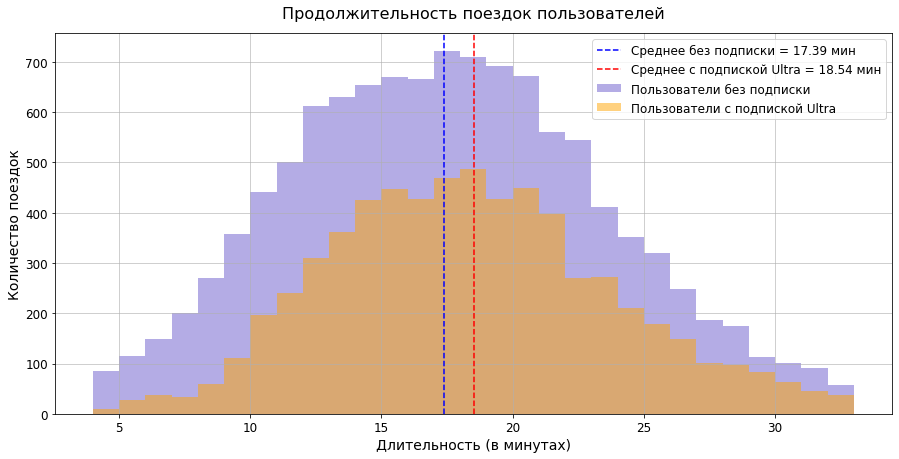

In [63]:
# Создаем новый график
plt.figure(figsize=(15, 7))

# График для пользователей без подписки
plt.hist(data_sub_free['duration'], bins=29, range=(4, 33), color='slateblue', alpha=0.5, label='Пользователи без подписки')
plt.axvline(data_sub_free['duration'].mean(), color='blue', linestyle='dashed', linewidth=1.5, label=f'Среднее без подписки = {data_sub_free["duration"].mean():.2f} мин')

# График для пользователей с подпиской Ultra
plt.hist(data_sub_ultra['duration'], bins=29, range=(4, 33), color='orange', alpha=0.5, label='Пользователи с подпиской Ultra')
plt.axvline(data_sub_ultra['duration'].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Среднее с подпиской Ultra = {data_sub_ultra["duration"].mean():.2f} мин')

plt.title('Продолжительность поездок пользователей', fontsize=16, pad=15)
plt.xlabel('Длительность (в минутах)', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

Проведем t-тест о равенстве средних

Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки

In [64]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(data_sub_ultra['duration'], data_sub_free['duration'], alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:**

- Пользователи с подпиской в среднем имеют продолжнительность поездки на 0.78 мин. больше.
- Т-тест показал, что пользователи с подпиской тратят больше времени на поездки.

##### Гипотеза о расстоянии, которое проезжают пользователи с подпиской за одну поездку

Нулевая гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку = 3130.

Альтернативная гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку > 3130.

In [65]:
interested_value = 3130 

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    data_sub_ultra['distance'],
    interested_value,
    alternative='greater') 

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу: расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130')
else:
    print('Не получилось отвергнуть нулевую гипотезу: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130


**Вывод:**
- Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130, что благоприятно отражается на износостойкости самокатов. 

##### Гипотеза о выручке от пользователей с подпиской и без подписки:

Нулевая гипотеза: средняя помесячная выручка от пользователей с подпиской и без равны.

Альтернативная гипотеза: средняя помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки.

In [66]:
# Создадим отдельные Series для анализа
aggregated_ultra_revenue = aggregated_data.query('subscription_type == "ultra"')['monthly_revenue']
aggregated_free_revenue = aggregated_data.query('subscription_type == "free"')['monthly_revenue']

In [67]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(aggregated_ultra_revenue, aggregated_free_revenue, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Полученное значение p-value (2.0720421367045467e-42) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу.

**Вывод**
- Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.

##### Выбор теста для технической команды сервиса 

**Формулировка :**

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ :**

Для проверки данной гипотезы понадобится двухвыборочный t-тест для парных выборок.

##### Вывод по проверке гипотез

1. Траты времени пользователей с подпиской и без
    - Пользователи с подпиской в среднем имеют продолжнительность поездки на 0.78 мин. больше.
    - Т-тест показал, что пользователи с подпиской тратят больше времени на поездки.
2. Гипотеза о расстоянии, которое проезжают пользователи с подпиской за одну поездку
    - Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130, что благоприятно отражается на износостойкости самокатов.
3. Гипотеза о выручке от пользователей с подпиской и без подписки
    - Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.
4. Выбор теста для технической команды сервиса
    - Для проверки данной гипотезы понадобится двухвыборочный t-тест для парных выборок.

#### Шаг 7. Распределения

##### Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 % 

Минимальное количество промокодов (на основе ppf): 1161


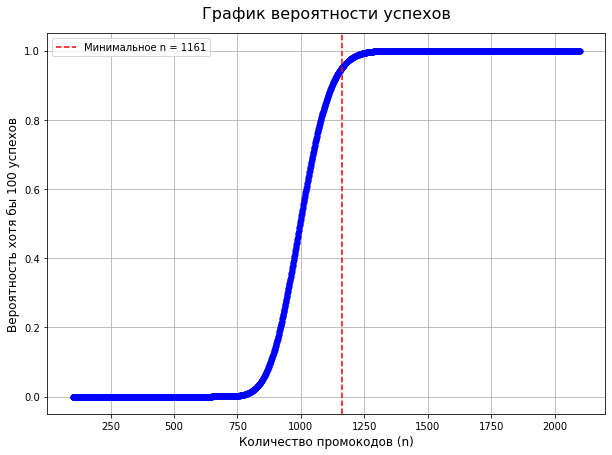

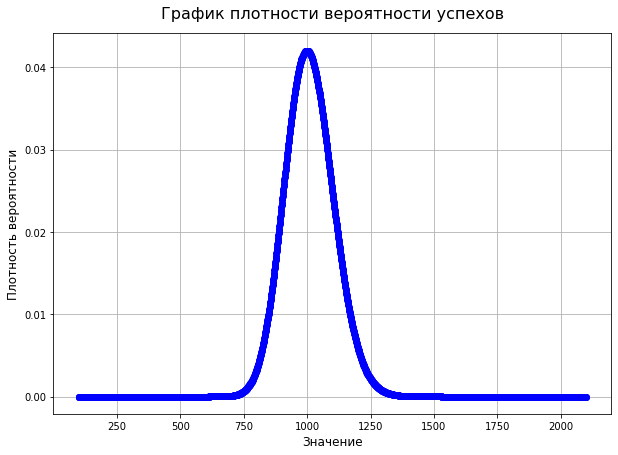

In [68]:
p_success = 0.1  # Вероятность успеха (продления подписки)
k = 100  # количество успехов
desired_probability = 0.95  # Желаемая вероятность успеха

# Подбор значения n
n_values = np.arange(k, k + 2000)
probabilities = binom.pmf(k, n_values, p_success)
binom_probs = 1 - binom.cdf(k - 1, n_values, p_success)

# Найдем индекс, где вероятность становится больше или равна desired_probability
index = np.argmax(binom_probs >= desired_probability)

min_required_n = n_values[index]

print("Минимальное количество промокодов (на основе ppf):", min_required_n)
plt.figure(figsize=(10, 7))
plt.plot(n_values, binom_probs, 'bo', ms=5)
plt.axvline(x=min_required_n, color='r', linestyle='--', label=f'Минимальное n = {min_required_n}')
plt.xlabel('Количество промокодов (n)', fontsize=12)
plt.ylabel('Вероятность хотя бы 100 успехов', fontsize=12)
plt.title('График вероятности успехов', fontsize=16, pad=15)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 7))
plt.plot(n_values, probabilities, 'bo')  
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('График плотности вероятности успехов', fontsize=16, pad=15)
plt.grid(True)
plt.show()

**Вывод**
- Минимальное количество промокодов которое нужно разослать, чтобы вероятность не выполнить план была примерно 
5% : 1161


##### Оценка вероятности того, что уведомление откроют не более 399,5 тыс. пользователей из 1 млн.

**Аппроксимация биномиального распределения нормальным**

0.15371708296369768


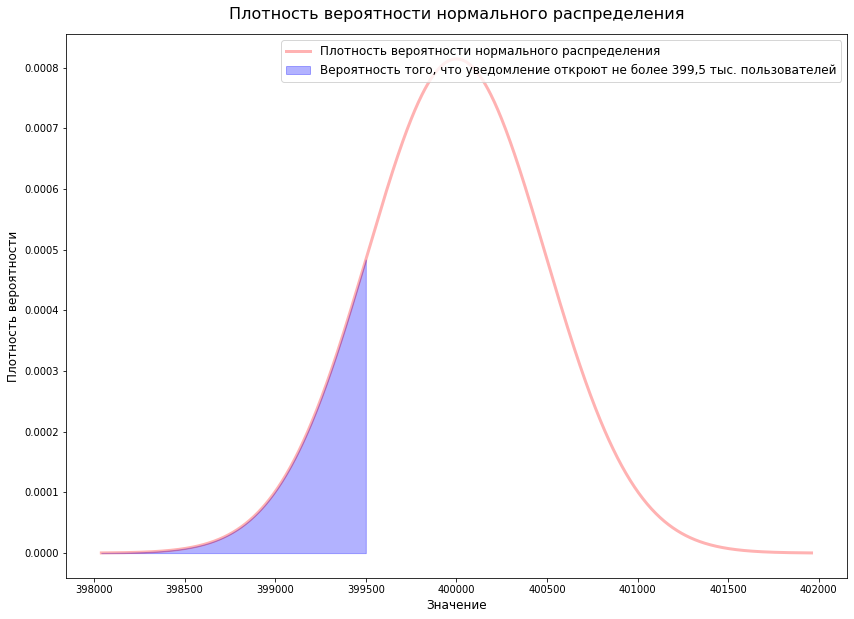

In [69]:
p = 0.4 # Вероятность успеха (открытие уфедомления)
n = 1000000 # Число уведомлений
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
# Задаем нормальное распределение
distr = st.norm(mu, sigma)

result = distr.cdf(399500)  # Найдем вероятность
print(result)

plt.figure(figsize=(14, 10))
# График плотности вероятности нормального распределения
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = distr.pdf(x)

# Закраска области под графиком до значения 399500
x_fill = np.linspace(mu - 4*sigma, 399500, 1000)
pdf_fill = distr.pdf(x_fill)
plt.fill_between(x_fill, pdf_fill, color='blue', alpha=0.3, label='Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей')

plt.plot(x, pdf, 'r-', lw=3, alpha=0.3, label='Плотность вероятности нормального распределения')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Плотность вероятности нормального распределения', fontsize=16, pad=15)
plt.show()

**Вывод**

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей из 1млн. : 15%

##### Вывод по распределениям

1. Минимальное количество промокодов которое нужно разослать, чтобы вероятность не выполнить план была примерно 5% : 1161
2. Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей из 1млн. : 15%

#### Общий вывод

1. **Предобработка данных**
    1. **Изменение типов данных и проверка записи столбцов**

        - Ошибок в записи названия столбцов не обнаружено
        - Изменили тип данных в стоблце 'date' таблицы data_rides с object на datetime
        - Добавили в датафрейм столбец с месяцем поездки
    
    2. **Проверка дубликатов и пропусков**
        - Процент дубликатов в датафрейме data_users : 1.98%. Все строчки-дубликаты были удалены
        - В датафрейме data_users нет пропусков в данных
        - В датафрейме data_users нет неявных дубликатов
        - В датафрейме data_rides нет дубликатов
        - В датафрейме data_rides нет пропусков
    3. **Выбросы и аномалии**
        - Обнаружили выбросы в столбце distance датафрейма data_rides. Не стали отбрасывать эти значения
        - Обнаружили выбросы в столбце duration датафрейма data_rides. Не стали отбрасывать эти значения
        
2. **Исследовательский анализ данных**

    1. **Частота встречаемости городов**

        - Среднее число пользователей в городе = 192
        - В таблице представлена информация по городам с наибольшим количеством пользователей:

        | Город          | Количество пользователей | Часть от всех пользователей (%) |
        |:--------------:|:-----------------------:|:-------------------------------:|
        | Пятигорск      |           219           |              14.3               |
        | Екатеринбург   |           204           |              13.3               |
        | Ростов-на-Дону |           198           |              12.9               |

        - В таблице представлена информация по городам с наименьшим количеством пользователей:

        | Город     | Количество пользователей | Часть от всех пользователей (%) |
        |:---------:|:-----------------------:|:-------------------------------:|
        | Омск      |           183           |              11.9               |
        | Тюмень    |           180           |              11.7               |
        | Москва    |           168           |              11.0               |

    2. **Соотношение пользователей с подпиской и без подписки**
       - В таблице представлена информация о пользователях с различными типами подписок:

        | Тип подписки | Количество пользователей | Часть от всех пользователей (%) |
        |:------------:|:-----------------------:|:-------------------------------:|
        | Ultra        |          699            |               45.6              |
        | Free         |          835            |               54.4              |

    3. **Возраст пользователей**
        - Средний возраст пользователя = 25
        - Возраст наиболее активных пользователей приведен в таблице:

        | Возраст | Количество пользователей | Часть от всех пользователей (%) |
        |:-------:|:-----------------------:|:-------------------------------:|
        |    25   |          145            |               9.45              |
        |    24   |          132            |                8.6              |
        |    26   |          131            |               8.54              |

        - Возраст наименее активных пользователей приведен в таблице:
    
        | Возраст | Количество пользователей | Часть от всех пользователей (%) |
        |:-------:|:-----------------------:|:-------------------------------:|
        |    37   |            2            |               0.13              |
        |    39   |            1            |               0.07              |
        |    43   |            1            |               0.07              |

    4. **Расстояние, которое пользователь преодолел за одну поездку**
       - Среднее расстояние, которое пользователь преодолел за одну поездку = 3070 м., а медиана = 3134 м.
       - В основном пользователи проезжают от 2000 до 4700 метров

    5. **Продолжительность поездок**
       - Средняя продолжительность поездки = 18 мин.
       - В основном пользователи используют самокат от 10 до 25 минут
       

3. **Объединение данных**
    1. **Объединение данных о пользователях, поездках и подписках в один датафрейм(data_full).**
    2. **Создание отделных датафреймов из датафрейма data_full**
        - Датафрейм с данными о пользователях без подписки : data_sub_free
        - Датафрейм с данными о пользователях с подпиской Ultra : data_sub_ultra
    3.  **Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий**
        - **Без подписки:**
            1. Информация о расстоянии 
            - Среднее расстояние, которое пользователь преодолел за одну поездку = 3045 м., а медиана = 3115 м.
            - В основном пользователи проезжают от 2000 до 4700 метров
            2. Информация о продолжительности поездок
                - Средняя продолжительность поездки = 17 мин.
                - В основном пользователи используют самокат от 10 до 25 минут
                - Распределение похоже на нормальное
        - **С подпиской Ultra:**
            1. Информация о расстоянии 
                - Среднее расстояние, которое пользователь преодолел за одну поездку = 3115 м., а медиана = 3149 м.
                - В основном пользователи проезжают от 2000 до 4700 метров

            2. Информация о продолжительности поездок
                - Средняя продолжительность поездки = 18.5 мин.
                - В основном пользователи используют самокат от 10 до 27 минут
                - Распределение похоже на нормальное
        - **Сравнение пользователей с разными категориями подписки :**

            1. В среднем пользователи с подпиской проезжают на 70 метров больше
            2. В среднем пользователи с подпиской проезжают на 1.5 мин больше
            3. Распределение расстояния, которое пользователь с подпиской Ultra, уже в области дальних поездок и шире в области коротких

4. **Подсчёт выручки**
    1. Создан датафрейм с агрегированными данными о поездках aggregated_data (суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц)
    2. Создан столбец monthly_revenue с помесячной выручкой
5. **Проверка гипотез**
    1. **Траты времени пользователей с подпиской и без**
        - Пользователи с подпиской в среднем имеют продолжнительность поездки на 0.78 мин. больше.
        - Т-тест показал, что пользователи с подпиской тратят больше времени на поездки.
    2. **Гипотеза о расстоянии, которое проезжают пользователи с подпиской за одну поездку**
        - Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130, что благоприятно отражается на износостойкости самокатов.
    3. **Гипотеза о выручке от пользователей с подпиской и без подписки**
        - Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.
    4. **Выбор теста для технической команды сервиса**
        - Для проверки данной гипотезы понадобится двухвыборочный t-тест для парных выборок.
6. **Распределения**
    1. Минимальное количество промокодов которое нужно разослать, чтобы вероятность не выполнить план была примерно 5% : 1161
    2. Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей из 1млн. : 15%